In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipyd
from libs import gif, nb_utils

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [2]:
from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 4px;
    color: #c7254e;
    background-color: #f9f2f4;
    border-radius: 4px;
} </style>""")

In [3]:
sess = tf.InteractiveSession()

In [4]:
from libs import inception
net = inception.get_inception_model()

In [5]:
nb_utils.show_graph(net['graph_def'])

In [6]:
tf.import_graph_def(net['graph_def'], name='inception')

In [7]:
net['labels']

[(0, 'dummy'),
 (1, 'kit fox'),
 (2, 'English setter'),
 (3, 'Siberian husky'),
 (4, 'Australian terrier'),
 (5, 'English springer'),
 (6, 'grey whale'),
 (7, 'lesser panda'),
 (8, 'Egyptian cat'),
 (9, 'ibex'),
 (10, 'Persian cat'),
 (11, 'cougar'),
 (12, 'gazelle'),
 (13, 'porcupine'),
 (14, 'sea lion'),
 (15, 'malamute'),
 (16, 'badger'),
 (17, 'Great Dane'),
 (18, 'Walker hound'),
 (19, 'Welsh springer spaniel'),
 (20, 'whippet'),
 (21, 'Scottish deerhound'),
 (22, 'killer whale'),
 (23, 'mink'),
 (24, 'African elephant'),
 (25, 'Weimaraner'),
 (26, 'soft-coated wheaten terrier'),
 (27, 'Dandie Dinmont'),
 (28, 'red wolf'),
 (29, 'Old English sheepdog'),
 (30, 'jaguar'),
 (31, 'otterhound'),
 (32, 'bloodhound'),
 (33, 'Airedale'),
 (34, 'hyena'),
 (35, 'meerkat'),
 (36, 'giant schnauzer'),
 (37, 'titi'),
 (38, 'three-toed sloth'),
 (39, 'sorrel'),
 (40, 'black-footed ferret'),
 (41, 'dalmatian'),
 (42, 'black-and-tan coonhound'),
 (43, 'papillon'),
 (44, 'skunk'),
 (45, 'Staffordsh

In [10]:
len(net['labels'])

1001

In [11]:
g = tf.get_default_graph()
names = [op.name for op in g.get_operations()]
print(names)

['inception/input', 'inception/conv2d0_w', 'inception/conv2d0_b', 'inception/conv2d1_w', 'inception/conv2d1_b', 'inception/conv2d2_w', 'inception/conv2d2_b', 'inception/mixed3a_1x1_w', 'inception/mixed3a_1x1_b', 'inception/mixed3a_3x3_bottleneck_w', 'inception/mixed3a_3x3_bottleneck_b', 'inception/mixed3a_3x3_w', 'inception/mixed3a_3x3_b', 'inception/mixed3a_5x5_bottleneck_w', 'inception/mixed3a_5x5_bottleneck_b', 'inception/mixed3a_5x5_w', 'inception/mixed3a_5x5_b', 'inception/mixed3a_pool_reduce_w', 'inception/mixed3a_pool_reduce_b', 'inception/mixed3b_1x1_w', 'inception/mixed3b_1x1_b', 'inception/mixed3b_3x3_bottleneck_w', 'inception/mixed3b_3x3_bottleneck_b', 'inception/mixed3b_3x3_w', 'inception/mixed3b_3x3_b', 'inception/mixed3b_5x5_bottleneck_w', 'inception/mixed3b_5x5_bottleneck_b', 'inception/mixed3b_5x5_w', 'inception/mixed3b_5x5_b', 'inception/mixed3b_pool_reduce_w', 'inception/mixed3b_pool_reduce_b', 'inception/mixed4a_1x1_w', 'inception/mixed4a_1x1_b', 'inception/mixed4a_3

In [12]:
input_name = names[0] + ':0'
x = g.get_tensor_by_name(input_name)

In [13]:
softmax = g.get_tensor_by_name(names[-1] + ':0')

In [14]:
print(x)

Tensor("inception/input:0", dtype=float32, device=/device:CPU:0)


0 255


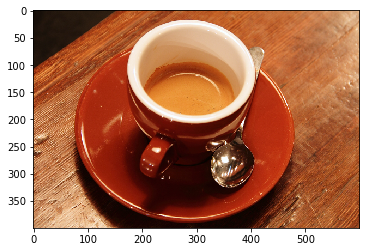

In [15]:
from skimage.data import coffee
og = coffee()
plt.imshow(og)
print(og.min(), og.max())

In [17]:
img = inception.preprocess(og)
print(og.shape), print(img.shape)

(400, 600, 3)
(299, 299, 3)


(None, None)

In [18]:
print(img.min(), img.max())

-117.0 136.0


In [19]:
img_4d = img[np.newaxis]
print(img_4d.shape)

(1, 299, 299, 3)


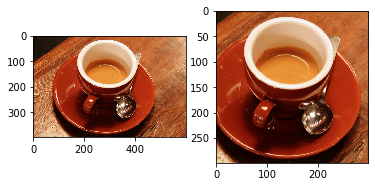

In [21]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(og)

axs[1].imshow(inception.deprocess(img))

In [22]:
res = np.squeeze(softmax.eval(feed_dict={x: img_4d}))

In [23]:
res.shape

(16, 1008)

In [24]:
res = np.mean(res, 0)
res = res/ np.sum(res)

In [25]:
print([(res[idx], net['labels'][idx])
      for idx in res.argsort()[-5:][::-1]])

[(0.9983383, (947, 'espresso')), (0.0006221638, (859, 'cup')), (0.00053180306, (953, 'chocolate sauce')), (0.00031610433, (844, 'consomme')), (0.00013780751, (822, 'soup bowl'))]


In [26]:
W = g.get_tensor_by_name('inception/conv2d0_w:0')
W_eval = W.eval()
print(W_eval.shape)

(7, 7, 3, 64)


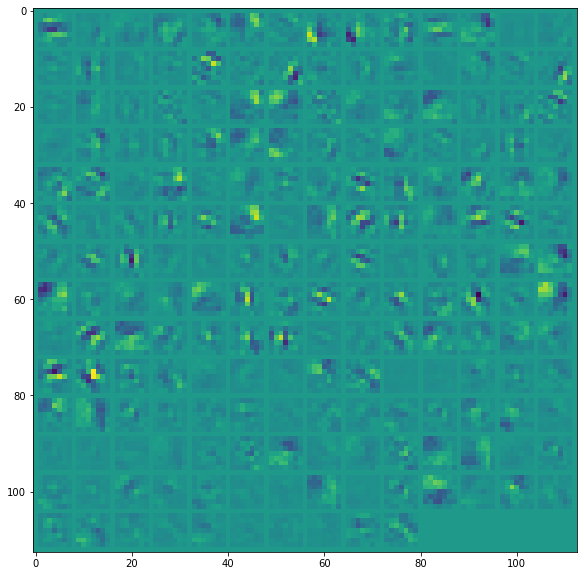

In [27]:
from libs import utils
W_montage = utils.montage_filters(W_eval)
plt.figure(figsize=(10,10))
plt.imshow(W_montage, interpolation='nearest')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


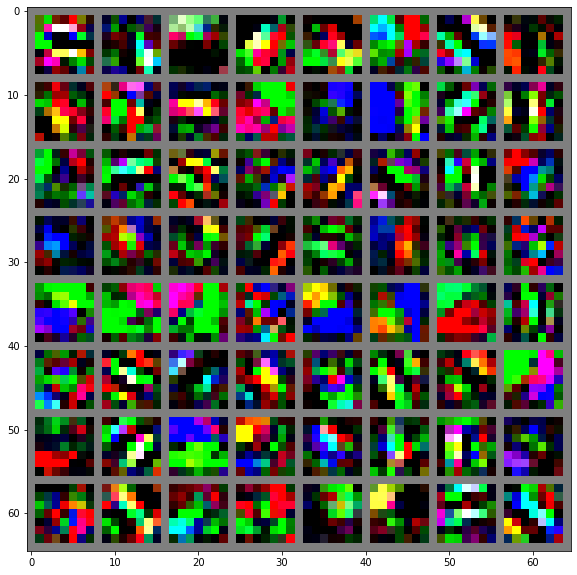

In [28]:
Ws = [utils.montage_filters(W_eval[:, :, [i], :]) for i in range(3)]
Ws = np.rollaxis(np.array(Ws), 0, 3)
plt.figure(figsize=(10,10))
plt.imshow(Ws, interpolation='nearest')

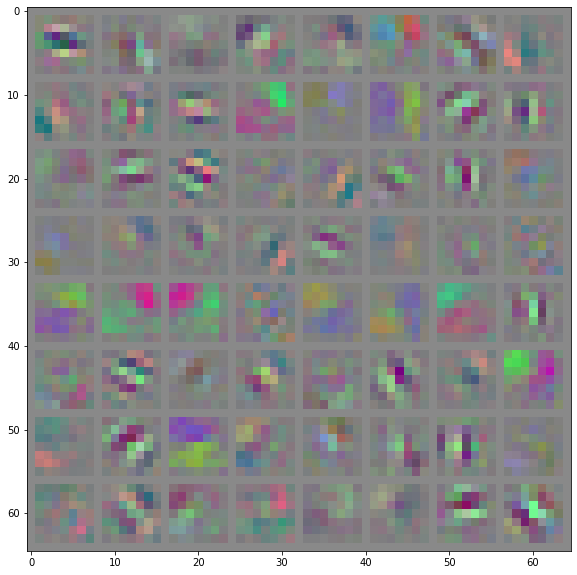

In [29]:
np.min(Ws), np.max(Ws)
Ws = (Ws/np.max(np.abs(Ws)) * 128 + 128).astype(np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(Ws, interpolation='nearest')

In [30]:
feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')

In [31]:
layer_shape = tf.shape(feature).eval(feed_dict={x:img_4d})
print(layer_shape)

[  1 150 150  64]


Text(0.5, 1.0, 'Convolution Outputs')

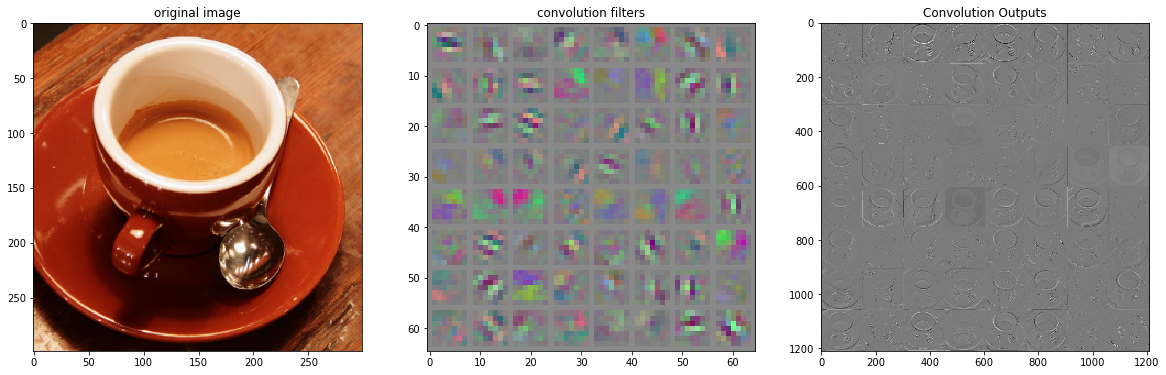

In [35]:
f = feature.eval(feed_dict={x:img_4d})
montage = utils.montage_filters(np.rollaxis(np.expand_dims(f[0],3),3,2))
fig, axs = plt.subplots(1,3, figsize=(20,10))
axs[0].imshow(inception.deprocess(img))
axs[0].set_title('original image')
axs[1].imshow(Ws, interpolation='nearest')
axs[1].set_title('convolution filters')
axs[2].imshow(montage, cmap='gray')
axs[2].set_title('Convolution Outputs')

In [37]:
feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')
gradient= tf.gradients(tf.reduce_max(feature, 3),x)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [38]:
res = sess.run(gradient, feed_dict={x:img_4d})[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


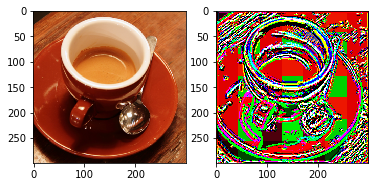

In [39]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(inception.deprocess(img))
axs[1].imshow(res[0])

In [40]:
def normalize(img, s=0.1):
    '''Normalize the image range for visualization'''
    z = img / np.std(img)
    return np.uint8(np.clip(
        (z - z.mean()) / max(z.std(), 1e-4) * s + 0.5, 0, 1) * 255)

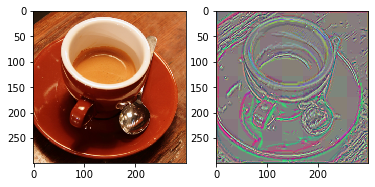

In [41]:
r = normalize(res)
fig, axs = plt.subplots(1,2)
axs[0].imshow(inception.deprocess(img))
axs[1].imshow(r[0])

In [42]:
def compute_gradient(input_placeholder, img, layer_name, neuron_i):
    feature = g.get_tensor_by_name(layer_name)
    gradient = tf.gradients(tf.reduce_mean(feature[:,:,:, neuron_i]), x)
    res = sess.run(gradient, feed_dict={input_placeholder: img})[0]
    return res

def compute_gradients(input_placeholder, img, layer_name):
    feature = g.get_tensor_by_name(layer_name)
    layer_shape = tf.shape(feature).eval(feed_dict={input_placeholder: img})
    gradients = []
    for neuron_i in range(layer_shape[-1]):
        gradients.append(compute_gradient(input_placeholder, img, layer_name, neuron_i))
    return gradients

In [43]:
gradients = compute_gradients(x, img_4d, 'inception/conv2d1_pre_relu:0')
gradients_norm = [normalize(gradient_i[0]) for gradient_i in gradients]
montage = utils.montage(np.array(gradients_norm))

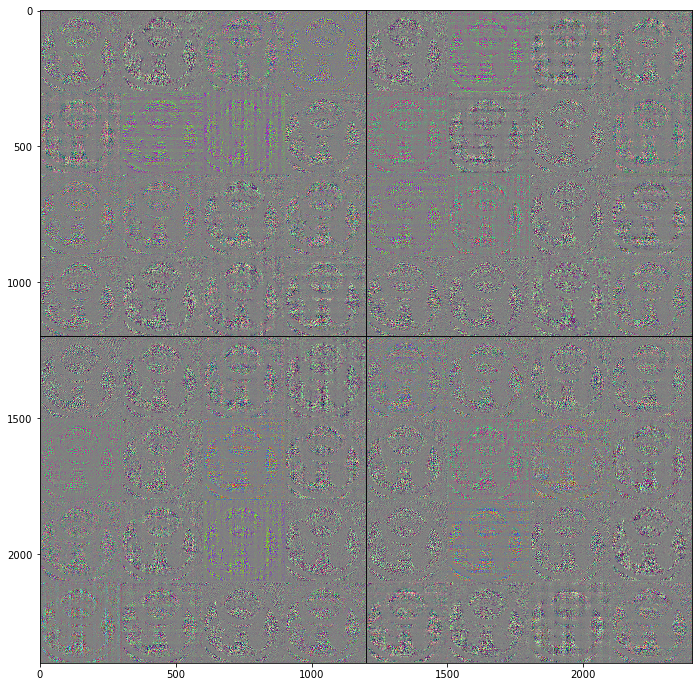

In [45]:
plt.figure(figsize=(12,12))
montage = normalize(montage)
plt.imshow(montage)

In [48]:
features = [name for name in names if 'maxpool' in name.split('/')[-1]]
print(features)

['inception/maxpool0', 'inception/maxpool1', 'inception/maxpool4', 'inception/maxpool10']


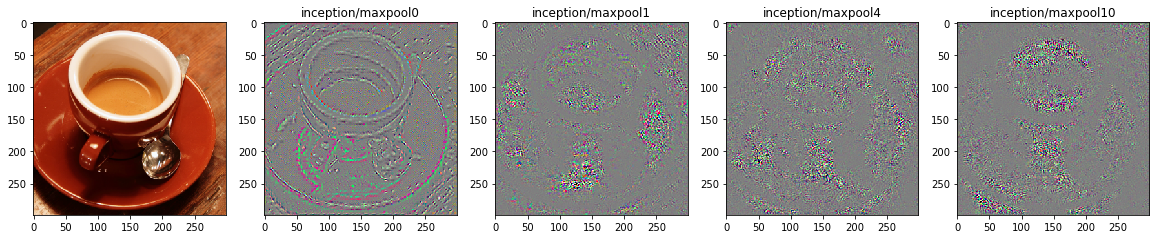

In [53]:
n_plots = len(features) + 1
fig, axs = plt.subplots(1, n_plots, figsize=(20, 5))
base = img_4d
axs[0].imshow(inception.deprocess(img))
for feature_i, featurename in enumerate(features):
    feature = g.get_tensor_by_name(featurename + ':0')
    neuron = tf.reduce_max(feature, len(feature.get_shape())-1)
    gradient= tf.gradients(tf.reduce_sum(neuron), x)
    this_res = sess.run(gradient[0], feed_dict={x:base})[0]
    axs[feature_i+1].imshow(normalize(this_res))
    axs[feature_i+1].set_title(featurename)